<a href="https://colab.research.google.com/github/oyeabhijit/clear-colab-24211/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as pd
import pandas as pd

# Importing CSV Dataset

In [ ]:
dataset = pd.read_csv('Data.csv')
x = dataset.iloc[ : , :-1].values
y = dataset.iloc[ : , -1].values

In [ ]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


# Difference between Class, Object and Methods

A class is the model of something we want to build. For example, if we make a house construction plan that gathers the instructions on how to build a house, then this construction plan is the class.

An object is an instance of the class. So if we take that same example of the house construction plan, then an object is simply a house. A house (the object) that was built by following the instructions of the construction plan (the class).
And therefore there can be many objects of the same class, because we can build many houses from the construction plan.

A method is a tool we can use on the object to complete a specific action. So in this same example, a tool can be to open the main door of the house if a guest is coming. A method can also be seen as a function that is applied onto the object, takes some inputs (that were defined in the class) and returns some output.

# Replacing Missing Value by Average of it's column 

In [ ]:
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[ : , 1:3])
x[ : , 1:3] = imputer.transform(x[ : , 1:3])

In [ ]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In line 3, imputer.fit(x[ : , 1:3]), [:] is to include all the bounds of the rows, where as [1:3] is used to include all the bounds from 1 to 2. But we also have 3 as the upper bound, that is because python excludes the upper bound function.

# Encoding Categorical Data

Encoding Indeoendent Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


# Encoding Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


# Splitting Dataset into Testing & Training Set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [ ]:
print(x_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [ ]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [ ]:
print(y_test)

[0 1]


# Feature Scaling

There are two types of Feature Scaling:

**Standardisation:** Subtracting each value of the feature by the mean of all the values of the feature and then dividing by standard deviation (square root of the variance). Feature varies between +3 and -3.

**Normalisation:** Subtracting each value of the minimum value of the feature. Then dividing by the difference between maximum value of the feature and the minimum value of the feature. Feature value varies between 0 and 1. 

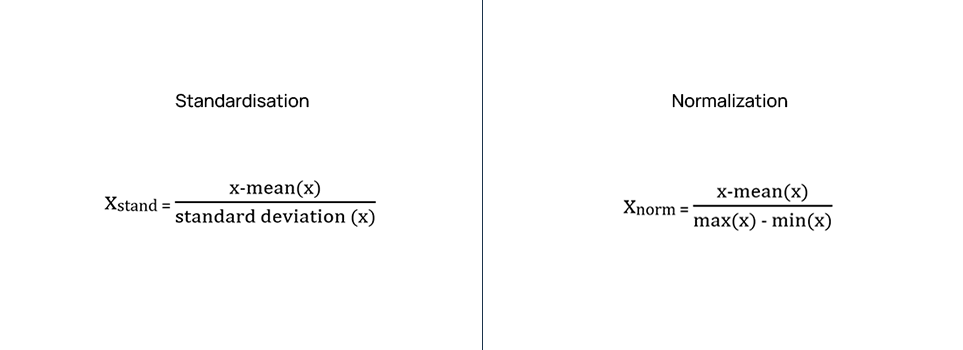

In [ ]:
from IPython.display import Image
Image(filename='2.png')
# This cell is just to show the image. It has no relation to the Data Preprocessing program.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:]=sc.fit_transform(x_train[:, 3:])
x_test[:, 3:]=sc.transform(x_test[:, 3:])

In [ ]:
print(x_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [ ]:
print(x_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
